In [1]:
import re
import string
import pandas as pd
import numpy as np

In [2]:
def clean_digit_punct(sentences):
    def clean_text(text):
        cleaned_text = ''
        words = re.findall(r'\b\w+\b', text)
        if words and not words[0].isdigit():
            cleaned_text = ' '.join(words)
        else:
            cleaned_text = ' '.join(words[1:])

        return cleaned_text

    cleaned_sentences = []

    if type(sentences) == str:
        cleaned_sentences = clean_text(sentences)
    else:
        try:
            for sentence in sentences:
                tmp_text = clean_text(sentence)
                cleaned_sentences.append(tmp_text) 

        except TypeError:
            cleaned_sentences = np.nan
        
    return cleaned_sentences


# function to remove "(number)" from the start of the sentence
def remove_article_number(text_with_artnumber):
    if text_with_artnumber:
        return re.sub(r'^\(\d+\)\s*', '', text_with_artnumber)
    else:
        return text_with_artnumber
    

def remove_startend_punct(text_with_punct):
    punctuations = string.punctuation
    if type(text_with_punct) == str and text_with_punct != '':    
        if text_with_punct[0] in punctuations:
            clean_text = text_with_punct[1:]
        elif text_with_punct[-1] in punctuations:
            clean_text = text_with_punct[:-1]
        else:
            clean_text = text_with_punct
    elif type(text_with_punct) == list:
        clean_text = [remove_startend_punct(sentence) for sentence in text_with_punct]
    else:
        clean_text = text_with_punct
        
    return clean_text

def list_of_text_clean(list_of_text):
    cleaned_text = []

    # check if the input is not a empty list
    if len(list_of_text) > 0:
        for txt in list_of_text:
            cleaned_text.append(remove_article_number(txt))
    else:
        cleaned_text = list_of_text
        
    return cleaned_text

def clean_keywords(keywords):
    ban_pattern = r"(\d\.[ A-Za-z.,;:\- ]*)|((\b\d|\b\d\d) [\d() ]*)|(sebagaimana [a-zA-Z0-9().,;:\- ]*)|^(dengan\s+)|([A-Za-z.,\- ]* yang dimaksud dengan)[ :]|(adalah[A-Za-z.,: ]*)|(^000,[0-9A-Za-z.,;:() ]*)|(^\d+[ ,.:;])|(^\d[0-9A-Za-z/.,() ]*)|(^[a-z]\.\s*[0-9A-Za-z.,/;:() ]*)|(^pada )"
    ban_text = "ditjen Peraturan Perundang-undangan"
    
    cleaned_keywords = []
    if keywords:
        for keyword in keywords:
            cleaned_keyword = remove_startend_punct(keyword)
            cleaned_keyword = re.sub(ban_pattern, "", cleaned_keyword)
            cleaned_keyword = re.sub(ban_text, "", cleaned_keyword)
            cleaned_keywords.append(cleaned_keyword.strip())
    else:
        cleaned_keywords = keywords
    
    return cleaned_keywords

def remove_blank(keywords):
    if keywords:
        return [keyword for keyword in keywords if keyword != '']
    else:
        return keywords

In [3]:
docs_df = pd.read_csv('../../data/law_analyzer_msib2_keywords.csv')
docs_df

,id,nomor_peraturan,judul,tahun,no,definisi,singkatan,heading
0,76-pmk.03-2010,76/PMK.03/2010,Tata Cara Pengajuan dan Penyelesaian Permintaa...,2010,76,"['Orang Pribadi Pemegang Paspor Luar Negeri,',...","['Orang Pribadi,', 'KPP', 'KPPN', 'SPM UP', 'S...","['KETENTUAN UMUM', 'PERMINTAAN PENGEMBALIAN PA..."
1,227-pmk.05-2011,227/PMK.05/2011,Penyusunan dan Pengesahan Daftar Isian Pelaksa...,2011,227,"['Kuasa Pengguna Anggaran Penerusan Pinjaman',...",['DIPA-L PP'],"['KETENTUAN UMUM', 'SISA ANGGARAN YANG DILANJU..."
2,38-pmk.05-2012,38/PMK.05/2012,Tarif Layanan Badan Layanan Umum Institut Agam...,2012,38,['Tarif Layanan Badan Layanan Umum Institut Ag...,[],[]
3,149-pmk.03-2011,149/PMK.03/2011,Sensus Pajak Nasional.,2011,149,['Sensus pajak nasional sebagaimana dimaksud p...,[],[]
4,20-pmk.04-2018,20/PMK.04/2018,Perubahan atas Peraturan Menteri Keuangan Nomo...,2018,20,[],[],[]
...,...,...,...,...,...,...,...,...
238,pp-81-tahun-2012,PP 81 TAHUN 2012,Pengelolaan Sampah Rumah Tangga dan Sampah Sej...,2012,81,"['Sampah rumah tangga', 'Sampah sejenis sampah...","['TPS 3R', 'Pemerintah']","['KETENTUAN UMUM', 'KEBIJAKAN DAN STRATEGI PEN..."
239,172-pmk.08-2017,172/PMK.08/2017,Tata Cara Pengadaan Pinjaman Luar Negeri Tunai.,2017,172,"['Pinjaman Tunai', 'Pinjaman Program', 'Pinjam...","['Menteri', 'Direktur Jenderal']","['KETENTUAN UMUM', 'RUANG LINGKUP', 'SUMBER PI..."
240,90-pmk.05-2009,90/PMK.05/2009,Pengelolaan Uang Negara di Bank Indonesia.,2009,90,"['Bendahara Umum Negara,', 'Menteri Keuangan',...","['Rekening KUN,']","['KETENTUAN UMUM', 'SALDO KAS MINIMAL', 'OPERA..."
241,pp-4-tahun-2011,PP 4 TAHUN 2011,Perubahan Struktur Kepemilikan Saham Negara Me...,2011,4,[],[],[]


In [4]:
# filter out records with _source.Judul started with "Perubahan"
docs_df = docs_df[~docs_df['judul'].str.startswith('Perubahan')]
docs_df

,id,nomor_peraturan,judul,tahun,no,definisi,singkatan,heading
0,76-pmk.03-2010,76/PMK.03/2010,Tata Cara Pengajuan dan Penyelesaian Permintaa...,2010,76,"['Orang Pribadi Pemegang Paspor Luar Negeri,',...","['Orang Pribadi,', 'KPP', 'KPPN', 'SPM UP', 'S...","['KETENTUAN UMUM', 'PERMINTAAN PENGEMBALIAN PA..."
1,227-pmk.05-2011,227/PMK.05/2011,Penyusunan dan Pengesahan Daftar Isian Pelaksa...,2011,227,"['Kuasa Pengguna Anggaran Penerusan Pinjaman',...",['DIPA-L PP'],"['KETENTUAN UMUM', 'SISA ANGGARAN YANG DILANJU..."
2,38-pmk.05-2012,38/PMK.05/2012,Tarif Layanan Badan Layanan Umum Institut Agam...,2012,38,['Tarif Layanan Badan Layanan Umum Institut Ag...,[],[]
3,149-pmk.03-2011,149/PMK.03/2011,Sensus Pajak Nasional.,2011,149,['Sensus pajak nasional sebagaimana dimaksud p...,[],[]
5,perpres-44-tahun-2013,PERPRES 44 TAHUN 2013,Penyesuaian Gaji Pokok Pegawai Negeri Sipil Me...,2013,44,['Rincian penyesuaian gaji pokok sebagaimana d...,[],[]
...,...,...,...,...,...,...,...,...
235,26-pmk.010-2017,26/PMK.010/2017,Penetapan Tarif Bea Masuk dalam Rangka Asean-C...,2017,26,['Menetapkan tarif bea masuk atas barang impor...,[],[]
238,pp-81-tahun-2012,PP 81 TAHUN 2012,Pengelolaan Sampah Rumah Tangga dan Sampah Sej...,2012,81,"['Sampah rumah tangga', 'Sampah sejenis sampah...","['TPS 3R', 'Pemerintah']","['KETENTUAN UMUM', 'KEBIJAKAN DAN STRATEGI PEN..."
239,172-pmk.08-2017,172/PMK.08/2017,Tata Cara Pengadaan Pinjaman Luar Negeri Tunai.,2017,172,"['Pinjaman Tunai', 'Pinjaman Program', 'Pinjam...","['Menteri', 'Direktur Jenderal']","['KETENTUAN UMUM', 'RUANG LINGKUP', 'SUMBER PI..."
240,90-pmk.05-2009,90/PMK.05/2009,Pengelolaan Uang Negara di Bank Indonesia.,2009,90,"['Bendahara Umum Negara,', 'Menteri Keuangan',...","['Rekening KUN,']","['KETENTUAN UMUM', 'SALDO KAS MINIMAL', 'OPERA..."


In [5]:
# evaluate the string into list from definisi, singkatan, and heading column
docs_df.loc[:, 'definisi'] = docs_df['definisi'].apply(lambda x: eval(x))
docs_df.loc[:, 'singkatan'] = docs_df['singkatan'].apply(lambda x: eval(x))
docs_df.loc[:, 'heading'] = docs_df['heading'].apply(lambda x: eval(x))

In [6]:
# clean the text in definisi, singkatan, and heading column
docs_df.loc[:, 'definisi'] = docs_df['definisi'].apply(lambda x: clean_keywords(x))
docs_df.loc[:, 'singkatan'] = docs_df['singkatan'].apply(lambda x: clean_keywords(x))
docs_df.loc[:, 'heading'] = docs_df['heading'].apply(lambda x: clean_keywords(x))

# remove start and end punctuation in judul, definisi, singkatan, and heading column
docs_df.loc[:, 'judul'] = docs_df['judul'].apply(lambda x: remove_startend_punct(x))
docs_df.loc[:, 'definisi'] = docs_df['definisi'].apply(lambda x: remove_startend_punct(x))
docs_df.loc[:, 'singkatan'] = docs_df['singkatan'].apply(lambda x: remove_startend_punct(x))
docs_df.loc[:, 'heading'] = docs_df['heading'].apply(lambda x: remove_startend_punct(x))

# post clean the text in definisi, singkatan, and heading column
docs_df.loc[:, 'definisi'] = docs_df['definisi'].apply(lambda x: clean_keywords(x))
docs_df.loc[:, 'singkatan'] = docs_df['singkatan'].apply(lambda x: clean_keywords(x))
docs_df.loc[:, 'heading'] = docs_df['heading'].apply(lambda x: clean_keywords(x))

# remove blank text in definisi, singkatan, and heading column
docs_df.loc[:, 'definisi'] = docs_df['definisi'].apply(lambda x: remove_blank(x))
docs_df.loc[:, 'singkatan'] = docs_df['singkatan'].apply(lambda x: remove_blank(x))
docs_df.loc[:, 'heading'] = docs_df['heading'].apply(lambda x: remove_blank(x))

In [7]:
docs_df

,id,nomor_peraturan,judul,tahun,no,definisi,singkatan,heading
0,76-pmk.03-2010,76/PMK.03/2010,Tata Cara Pengajuan dan Penyelesaian Permintaa...,2010,76,"[Orang Pribadi Pemegang Paspor Luar Negeri, Ba...","[Orang Pribadi, KPP, KPPN, SPM UP, SKPKPP, SPM...","[KETENTUAN UMUM, PERMINTAAN PENGEMBALIAN PAJAK..."
1,227-pmk.05-2011,227/PMK.05/2011,Penyusunan dan Pengesahan Daftar Isian Pelaksa...,2011,227,"[Kuasa Pengguna Anggaran Penerusan Pinjaman, P...",[DIPA-L PP],"[KETENTUAN UMUM, SISA ANGGARAN YANG DILANJUTKA..."
2,38-pmk.05-2012,38/PMK.05/2012,Tarif Layanan Badan Layanan Umum Institut Agam...,2012,38,[Tarif Layanan Badan Layanan Umum Institut Aga...,[],[]
3,149-pmk.03-2011,149/PMK.03/2011,Sensus Pajak Nasional,2011,149,[Sensus pajak nasional],[],[]
5,perpres-44-tahun-2013,PERPRES 44 TAHUN 2013,Penyesuaian Gaji Pokok Pegawai Negeri Sipil Me...,2013,44,[Rincian penyesuaian gaji pokok],[],[]
...,...,...,...,...,...,...,...,...
235,26-pmk.010-2017,26/PMK.010/2017,Penetapan Tarif Bea Masuk dalam Rangka Asean-C...,2017,26,[Menetapkan tarif bea masuk atas barang impor ...,[],[]
238,pp-81-tahun-2012,PP 81 TAHUN 2012,Pengelolaan Sampah Rumah Tangga dan Sampah Sej...,2012,81,"[Sampah rumah tangga, Sampah sejenis sampah ru...","[TPS 3R, Pemerintah]","[KETENTUAN UMUM, KEBIJAKAN DAN STRATEGI PENGEL..."
239,172-pmk.08-2017,172/PMK.08/2017,Tata Cara Pengadaan Pinjaman Luar Negeri Tunai,2017,172,"[Pinjaman Tunai, Pinjaman Program, Pinjaman Si...","[Menteri, Direktur Jenderal]","[KETENTUAN UMUM, RUANG LINGKUP, SUMBER PINJAMA..."
240,90-pmk.05-2009,90/PMK.05/2009,Pengelolaan Uang Negara di Bank Indonesia,2009,90,"[Bendahara Umum Negara, Menteri Keuangan, Kuas...",[Rekening KUN],"[KETENTUAN UMUM, SALDO KAS MINIMAL, OPERASIONA..."


# Data Exploration

In [8]:
# combine all definisi into one list and count the frequency of each definisi
all_definisi = []
all_heading = []
all_def_index = []
all_head_index = []

for i, definisi in enumerate(docs_df['definisi']):
    for text in definisi:
        if text != '':
            all_def_index.append(i)
            all_definisi.append(text)
            
for i, heading in enumerate(docs_df['heading']):
    for text in heading:
        if text != '':
            all_head_index.append(i)
            all_heading.append(text)

print('jumlah definisi:',len(all_definisi))
print('jumlah heading:',len(all_heading))

jumlah definisi: 1121
jumlah heading: 863


In [9]:
definisi_freq = pd.Series(all_definisi).value_counts()
heading_freq = pd.Series(all_heading).value_counts()

In [10]:
definisi_freq

Menteri                                                                            17
Pemerintah Daerah                                                                  10
Direktur Jenderal                                                                   9
Perusahaan                                                                          7
Pemerintah Pusat                                                                    7
                                                                                   ..
Hibah Pemerintah                                                                    1
Daftar Isian Pelaksanaan Anggaran yang selanjutnyadisebut DIPA                      1
Pemberi Hibah                                                                       1
Direktorat Jenderal Pengelolaan Pembiayaan dan Risiko                               1
Pengelolaan Dokumentasi dan Informasi Hukum Bidang Keuangan dan Kekayaan Negara     1
Name: count, Length: 859, dtype: int64

In [11]:
heading_freq

KETENTUAN PENUTUP                                  57
KETENTUAN UMUM                                     55
KETENTUAN PERALIHAN                                27
KETENTUAN LAIN-LAIN                                18
Umum                                               14
                                                   ..
Wewenang                                            1
VALUATION ADVICE                                    1
TATA CARA PENGAJUAN PERMOHONAN VALUATION ADVICE     1
PENELITIAN PERMOHONAN VALUATION ADVICE              1
Tim Teknis JDIH                                     1
Name: count, Length: 639, dtype: int64

In [12]:
# create dataframe of all_definisi with its length and index from main dataframe (data)
definisi_length = pd.Series([len(text) for text in all_definisi])
definisi_df = pd.DataFrame({'definisi': all_definisi, 'length': definisi_length, 'data_index': all_def_index})
#definisi_df

# get definisi_df with length in necessary range
#definisi_df[definisi_df['length'] > 200]

In [13]:
# create dataframe of all_heading with its length and index from main dataframe (data)
heading_length = pd.Series([len(text) for text in all_heading])
heading_df = pd.DataFrame({'heading': all_heading, 'length': heading_length, 'data_index': all_head_index})
#heading_df

# get heading_df with length in necessary range
#heading_df[heading_df['length'] >= 150]

In [14]:
# filter & remove value in definisi & heading
docs_df['definisi'] = docs_df['definisi'].apply(lambda x: [text for text in x if len(text) <= 200])
docs_df['heading'] = docs_df['heading'].apply(lambda x: [text for text in x if len(text) <= 252])
docs_df

C:\Users\zoxrl\AppData\Local\Temp\ipykernel_16604\331933672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  docs_df['definisi'] = docs_df['definisi'].apply(lambda x: [text for text in x if len(text) <= 200])
C:\Users\zoxrl\AppData\Local\Temp\ipykernel_16604\331933672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  docs_df['heading'] = docs_df['heading'].apply(lambda x: [text for text in x if len(text) <= 252])


,id,nomor_peraturan,judul,tahun,no,definisi,singkatan,heading
0,76-pmk.03-2010,76/PMK.03/2010,Tata Cara Pengajuan dan Penyelesaian Permintaa...,2010,76,"[Orang Pribadi Pemegang Paspor Luar Negeri, Ba...","[Orang Pribadi, KPP, KPPN, SPM UP, SKPKPP, SPM...","[KETENTUAN UMUM, PERMINTAAN PENGEMBALIAN PAJAK..."
1,227-pmk.05-2011,227/PMK.05/2011,Penyusunan dan Pengesahan Daftar Isian Pelaksa...,2011,227,"[Kuasa Pengguna Anggaran Penerusan Pinjaman, P...",[DIPA-L PP],"[KETENTUAN UMUM, SISA ANGGARAN YANG DILANJUTKA..."
2,38-pmk.05-2012,38/PMK.05/2012,Tarif Layanan Badan Layanan Umum Institut Agam...,2012,38,[Tarif Layanan Badan Layanan Umum Institut Aga...,[],[]
3,149-pmk.03-2011,149/PMK.03/2011,Sensus Pajak Nasional,2011,149,[Sensus pajak nasional],[],[]
5,perpres-44-tahun-2013,PERPRES 44 TAHUN 2013,Penyesuaian Gaji Pokok Pegawai Negeri Sipil Me...,2013,44,[Rincian penyesuaian gaji pokok],[],[]
...,...,...,...,...,...,...,...,...
235,26-pmk.010-2017,26/PMK.010/2017,Penetapan Tarif Bea Masuk dalam Rangka Asean-C...,2017,26,[Menetapkan tarif bea masuk atas barang impor ...,[],[]
238,pp-81-tahun-2012,PP 81 TAHUN 2012,Pengelolaan Sampah Rumah Tangga dan Sampah Sej...,2012,81,"[Sampah rumah tangga, Sampah sejenis sampah ru...","[TPS 3R, Pemerintah]","[KETENTUAN UMUM, KEBIJAKAN DAN STRATEGI PENGEL..."
239,172-pmk.08-2017,172/PMK.08/2017,Tata Cara Pengadaan Pinjaman Luar Negeri Tunai,2017,172,"[Pinjaman Tunai, Pinjaman Program, Pinjaman Si...","[Menteri, Direktur Jenderal]","[KETENTUAN UMUM, RUANG LINGKUP, SUMBER PINJAMA..."
240,90-pmk.05-2009,90/PMK.05/2009,Pengelolaan Uang Negara di Bank Indonesia,2009,90,"[Bendahara Umum Negara, Menteri Keuangan, Kuas...",[Rekening KUN],"[KETENTUAN UMUM, SALDO KAS MINIMAL, OPERASIONA..."


In [15]:
# list nomor_peraturan if definisi and heading column is empty list
docs_df[docs_df['definisi'].apply(lambda x: len(x) == 0) & docs_df['heading'].apply(lambda x: len(x) == 0)]['nomor_peraturan']

8             133/PMK.01/2017
25           PP 45 TAHUN 2014
35            222/PMK.07/2017
36           PP 32 TAHUN 2014
56       PERPRES 1 TAHUN 2015
60      PERPRES 86 TAHUN 2017
74            209/PMK.02/2013
78            221/PMK.07/2011
89            225/PMK.07/2011
93             15/PMK.03/2018
95            10/PMK.011/2014
96           PP 51 TAHUN 2014
97            50/PMK.010/2016
123           PP 4 TAHUN 2012
124           209/PMK.02/2017
125          PP 14 TAHUN 2011
126           54/PMK.011/2011
134           208/PMK.07/2011
135          PP 25 TAHUN 2013
139     PERPRES 29 TAHUN 2013
140     PERPRES 42 TAHUN 2012
146          176/PMK.011/2011
148    PERPRES 114 TAHUN 2018
179     PERPRES 19 TAHUN 2014
191           PP 8 TAHUN 2019
200           202/PMK.07/2009
201           212/PMK.07/2012
202           106/PMK.07/2014
204     PERPRES 75 TAHUN 2012
205           31/PMK.010/2019
213            28/PMK.05/2019
218          PP 49 TAHUN 2019
223            90/PMK.05/2019
225     PE

In [16]:
# drop rows with definisi and heading column is empty list
docs_df = docs_df[~(docs_df['definisi'].apply(lambda x: len(x) == 0) & docs_df['heading'].apply(lambda x: len(x) == 0))]
docs_df

,id,nomor_peraturan,judul,tahun,no,definisi,singkatan,heading
0,76-pmk.03-2010,76/PMK.03/2010,Tata Cara Pengajuan dan Penyelesaian Permintaa...,2010,76,"[Orang Pribadi Pemegang Paspor Luar Negeri, Ba...","[Orang Pribadi, KPP, KPPN, SPM UP, SKPKPP, SPM...","[KETENTUAN UMUM, PERMINTAAN PENGEMBALIAN PAJAK..."
1,227-pmk.05-2011,227/PMK.05/2011,Penyusunan dan Pengesahan Daftar Isian Pelaksa...,2011,227,"[Kuasa Pengguna Anggaran Penerusan Pinjaman, P...",[DIPA-L PP],"[KETENTUAN UMUM, SISA ANGGARAN YANG DILANJUTKA..."
2,38-pmk.05-2012,38/PMK.05/2012,Tarif Layanan Badan Layanan Umum Institut Agam...,2012,38,[Tarif Layanan Badan Layanan Umum Institut Aga...,[],[]
3,149-pmk.03-2011,149/PMK.03/2011,Sensus Pajak Nasional,2011,149,[Sensus pajak nasional],[],[]
5,perpres-44-tahun-2013,PERPRES 44 TAHUN 2013,Penyesuaian Gaji Pokok Pegawai Negeri Sipil Me...,2013,44,[Rincian penyesuaian gaji pokok],[],[]
...,...,...,...,...,...,...,...,...
235,26-pmk.010-2017,26/PMK.010/2017,Penetapan Tarif Bea Masuk dalam Rangka Asean-C...,2017,26,[Menetapkan tarif bea masuk atas barang impor ...,[],[]
238,pp-81-tahun-2012,PP 81 TAHUN 2012,Pengelolaan Sampah Rumah Tangga dan Sampah Sej...,2012,81,"[Sampah rumah tangga, Sampah sejenis sampah ru...","[TPS 3R, Pemerintah]","[KETENTUAN UMUM, KEBIJAKAN DAN STRATEGI PENGEL..."
239,172-pmk.08-2017,172/PMK.08/2017,Tata Cara Pengadaan Pinjaman Luar Negeri Tunai,2017,172,"[Pinjaman Tunai, Pinjaman Program, Pinjaman Si...","[Menteri, Direktur Jenderal]","[KETENTUAN UMUM, RUANG LINGKUP, SUMBER PINJAMA..."
240,90-pmk.05-2009,90/PMK.05/2009,Pengelolaan Uang Negara di Bank Indonesia,2009,90,"[Bendahara Umum Negara, Menteri Keuangan, Kuas...",[Rekening KUN],"[KETENTUAN UMUM, SALDO KAS MINIMAL, OPERASIONA..."


In [17]:
# combine sentence in definisi and heading column into one sentence into new column called 'keyword'
# docs_df['keywords'] = docs_df['definisi'] + docs_df['singkatan'] + docs_df['heading']
docs_df['keywords'] = docs_df['definisi'] + docs_df['heading']
docs_df

C:\Users\zoxrl\AppData\Local\Temp\ipykernel_16604\1244501065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  docs_df['keywords'] = docs_df['definisi'] + docs_df['heading']


,id,nomor_peraturan,judul,tahun,no,definisi,singkatan,heading,keywords
0,76-pmk.03-2010,76/PMK.03/2010,Tata Cara Pengajuan dan Penyelesaian Permintaa...,2010,76,"[Orang Pribadi Pemegang Paspor Luar Negeri, Ba...","[Orang Pribadi, KPP, KPPN, SPM UP, SKPKPP, SPM...","[KETENTUAN UMUM, PERMINTAAN PENGEMBALIAN PAJAK...","[Orang Pribadi Pemegang Paspor Luar Negeri, Ba..."
1,227-pmk.05-2011,227/PMK.05/2011,Penyusunan dan Pengesahan Daftar Isian Pelaksa...,2011,227,"[Kuasa Pengguna Anggaran Penerusan Pinjaman, P...",[DIPA-L PP],"[KETENTUAN UMUM, SISA ANGGARAN YANG DILANJUTKA...","[Kuasa Pengguna Anggaran Penerusan Pinjaman, P..."
2,38-pmk.05-2012,38/PMK.05/2012,Tarif Layanan Badan Layanan Umum Institut Agam...,2012,38,[Tarif Layanan Badan Layanan Umum Institut Aga...,[],[],[Tarif Layanan Badan Layanan Umum Institut Aga...
3,149-pmk.03-2011,149/PMK.03/2011,Sensus Pajak Nasional,2011,149,[Sensus pajak nasional],[],[],[Sensus pajak nasional]
5,perpres-44-tahun-2013,PERPRES 44 TAHUN 2013,Penyesuaian Gaji Pokok Pegawai Negeri Sipil Me...,2013,44,[Rincian penyesuaian gaji pokok],[],[],[Rincian penyesuaian gaji pokok]
...,...,...,...,...,...,...,...,...,...
235,26-pmk.010-2017,26/PMK.010/2017,Penetapan Tarif Bea Masuk dalam Rangka Asean-C...,2017,26,[Menetapkan tarif bea masuk atas barang impor ...,[],[],[Menetapkan tarif bea masuk atas barang impor ...
238,pp-81-tahun-2012,PP 81 TAHUN 2012,Pengelolaan Sampah Rumah Tangga dan Sampah Sej...,2012,81,"[Sampah rumah tangga, Sampah sejenis sampah ru...","[TPS 3R, Pemerintah]","[KETENTUAN UMUM, KEBIJAKAN DAN STRATEGI PENGEL...","[Sampah rumah tangga, Sampah sejenis sampah ru..."
239,172-pmk.08-2017,172/PMK.08/2017,Tata Cara Pengadaan Pinjaman Luar Negeri Tunai,2017,172,"[Pinjaman Tunai, Pinjaman Program, Pinjaman Si...","[Menteri, Direktur Jenderal]","[KETENTUAN UMUM, RUANG LINGKUP, SUMBER PINJAMA...","[Pinjaman Tunai, Pinjaman Program, Pinjaman Si..."
240,90-pmk.05-2009,90/PMK.05/2009,Pengelolaan Uang Negara di Bank Indonesia,2009,90,"[Bendahara Umum Negara, Menteri Keuangan, Kuas...",[Rekening KUN],"[KETENTUAN UMUM, SALDO KAS MINIMAL, OPERASIONA...","[Bendahara Umum Negara, Menteri Keuangan, Kuas..."


In [18]:
# combine all keywords into one list and count the frequency of each keyword
all_keywords = []

for i, keywords in enumerate(docs_df['keywords']):
    for keyword in keywords:
        if keyword != '':
            all_keywords.append(keyword)

keywords_freq = pd.Series(all_keywords).value_counts()
keywords_freq

KETENTUAN PENUTUP                                      57
KETENTUAN UMUM                                         55
KETENTUAN PERALIHAN                                    27
KETENTUAN LAIN-LAIN                                    18
Menteri                                                17
                                                       ..
Bank Persepsi dan Pos Persepsi                          1
Bendahara Penerimaan                                    1
Wajib Setor                                             1
Penerimaan Negara Dalam Rangka Kepabeanan Dan Cukai     1
Tim Teknis JDIH                                         1
Name: count, Length: 1456, dtype: int64

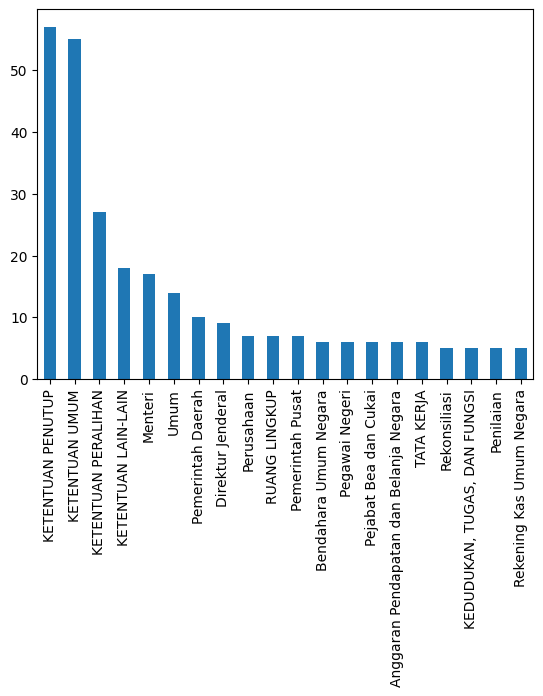

In [19]:
# plot the frequency of each keyword (only top 20)
import matplotlib.pyplot as plt

keywords_freq[:20].plot(kind='bar')
plt.show()

In [20]:
# get 10 most frequent keywords
top_4_keywords = keywords_freq[:4].index
 # transform to list
top_4_keywords = top_4_keywords.tolist()
top_4_keywords

['KETENTUAN PENUTUP',
 'KETENTUAN UMUM',
 'KETENTUAN PERALIHAN',
 'KETENTUAN LAIN-LAIN']

In [21]:
# remove the top 10 keywords from the keywords column
docs_df['keywords'] = docs_df['keywords'].apply(lambda x: [keyword for keyword in x if keyword not in top_4_keywords])
docs_df

C:\Users\zoxrl\AppData\Local\Temp\ipykernel_16604\3885745037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  docs_df['keywords'] = docs_df['keywords'].apply(lambda x: [keyword for keyword in x if keyword not in top_4_keywords])


,id,nomor_peraturan,judul,tahun,no,definisi,singkatan,heading,keywords
0,76-pmk.03-2010,76/PMK.03/2010,Tata Cara Pengajuan dan Penyelesaian Permintaa...,2010,76,"[Orang Pribadi Pemegang Paspor Luar Negeri, Ba...","[Orang Pribadi, KPP, KPPN, SPM UP, SKPKPP, SPM...","[KETENTUAN UMUM, PERMINTAAN PENGEMBALIAN PAJAK...","[Orang Pribadi Pemegang Paspor Luar Negeri, Ba..."
1,227-pmk.05-2011,227/PMK.05/2011,Penyusunan dan Pengesahan Daftar Isian Pelaksa...,2011,227,"[Kuasa Pengguna Anggaran Penerusan Pinjaman, P...",[DIPA-L PP],"[KETENTUAN UMUM, SISA ANGGARAN YANG DILANJUTKA...","[Kuasa Pengguna Anggaran Penerusan Pinjaman, P..."
2,38-pmk.05-2012,38/PMK.05/2012,Tarif Layanan Badan Layanan Umum Institut Agam...,2012,38,[Tarif Layanan Badan Layanan Umum Institut Aga...,[],[],[Tarif Layanan Badan Layanan Umum Institut Aga...
3,149-pmk.03-2011,149/PMK.03/2011,Sensus Pajak Nasional,2011,149,[Sensus pajak nasional],[],[],[Sensus pajak nasional]
5,perpres-44-tahun-2013,PERPRES 44 TAHUN 2013,Penyesuaian Gaji Pokok Pegawai Negeri Sipil Me...,2013,44,[Rincian penyesuaian gaji pokok],[],[],[Rincian penyesuaian gaji pokok]
...,...,...,...,...,...,...,...,...,...
235,26-pmk.010-2017,26/PMK.010/2017,Penetapan Tarif Bea Masuk dalam Rangka Asean-C...,2017,26,[Menetapkan tarif bea masuk atas barang impor ...,[],[],[Menetapkan tarif bea masuk atas barang impor ...
238,pp-81-tahun-2012,PP 81 TAHUN 2012,Pengelolaan Sampah Rumah Tangga dan Sampah Sej...,2012,81,"[Sampah rumah tangga, Sampah sejenis sampah ru...","[TPS 3R, Pemerintah]","[KETENTUAN UMUM, KEBIJAKAN DAN STRATEGI PENGEL...","[Sampah rumah tangga, Sampah sejenis sampah ru..."
239,172-pmk.08-2017,172/PMK.08/2017,Tata Cara Pengadaan Pinjaman Luar Negeri Tunai,2017,172,"[Pinjaman Tunai, Pinjaman Program, Pinjaman Si...","[Menteri, Direktur Jenderal]","[KETENTUAN UMUM, RUANG LINGKUP, SUMBER PINJAMA...","[Pinjaman Tunai, Pinjaman Program, Pinjaman Si..."
240,90-pmk.05-2009,90/PMK.05/2009,Pengelolaan Uang Negara di Bank Indonesia,2009,90,"[Bendahara Umum Negara, Menteri Keuangan, Kuas...",[Rekening KUN],"[KETENTUAN UMUM, SALDO KAS MINIMAL, OPERASIONA...","[Bendahara Umum Negara, Menteri Keuangan, Kuas..."


In [22]:
# save the data into csv file
docs_df.to_csv('../../data/law_analyzer_msib2_keywords_cleaned.csv', index=False)

# Data Preparation for Testing

In [23]:
# filter out records with keywords list if has less than 2 keywords
docs_df = docs_df[docs_df['keywords'].apply(lambda x: len(x) >= 4)]
# remove definisi, singkatan, and heading column
docs_df = docs_df.drop(columns=['definisi', 'singkatan', 'heading'])

In [24]:
# read col.txt file
with open('selected_column.txt', 'r') as f:
    col = f.read().splitlines()

# filter in records with judul column is in col
docs_df_filt = docs_df[docs_df['judul'].isin(col)]
docs_df_filt

,id,nomor_peraturan,judul,tahun,no,keywords
19,185-pmk.06-2009,185/PMK.06/2009,Penilaian Aset Bekas Milik Asing/Cina dan Bend...,2009,185,"[Aset Bekas Milik Asing dan Bekas Milik Cina, ..."
20,25-pmk.01-2014,25/PMK.01/2014,Akuntan Beregister Negara,2014,25,"[Akuntan, Kantor Jasa Akuntansi, Register Nega..."
21,176-pmk.05-2017,176/PMK.05/2017,Pedoman Remunerasi Badan Layanan Umum,2017,176,"[Badan Layanan Umum, Pejabat Pengelola BLU, Pe..."
30,82-pmk.03-2017,82/PMK.03/2017,Pemberian Pengurangan Pajak Bumi dan Bangunan,2017,82,[Undang-Undang Ketentuan Umum dan Tata Cara Pe...
43,pp-85-tahun-2013,PP 85 TAHUN 2013,Tata Cara Hubungan Antar Lembaga Badan Penyele...,2013,85,"[Badan Penyelenggara Jaminan Sosial, Jaminan S..."
50,104-pmk.05-2017,104/PMK.05/2017,Pedoman Rekonsiliasi dalam Penyusunan Laporan ...,2017,104,"[Rekonsiliasi, Bendahara Umum Negara, Kuasa Be..."
58,pp-21-tahun-2008,PP 21 TAHUN 2008,Penyelenggaraan Penanggulangan Bencana,2008,21,"[Bencana, Penyelenggaraan penanggulangan benca..."
64,perpres-67-tahun-2013,PERPRES 67 TAHUN 2013,Koordinasi Intelijen Negara,2013,67,"[Badan Intelijen Negara, BIN di daerah, Koordi..."
73,40-pmk.04-2016,40/PMK.04/2016,Pembayaran Dan/ atau Penyetoran Penerimaan Neg...,2016,40,"[Undang-Undang Kepabeanan, Penerimaan Negara D..."
80,99-pmk.05-2017,99/PMK.05/2017,Administrasi Pengelolaan Hibah,2017,99,"[Anggaran Pendapatan dan Belanja Negara, Kemen..."


In [25]:
# save the data into csv file
docs_df_filt.to_csv('../../data/law_analyzer_msib2_keywords_cleaned_filtered.csv', index=False)